# ML: Assignment 3

## Libraries

Please use the respective `requirements_*.txt` file.
In case of errors install here.

### Installs & External

In [1]:
# !pip install tensorflow-macos nltk

### Imports

In [2]:
import tensorflow as tf

import pandas as pd

import matplotlib
import matplotlib.pyplot as plt

In [3]:
from src.data_loading import DataLoader
from src.data_processing import Process

from src.next_word_model import NextWordModel

from src.prediction_evaluation import Evaluator

/Users/tilmankerl/Documents/UNI/01_WS22/Machine Learning/exercises/03/env/lib/python3.9/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
[nltk_data] Downloading package wordnet to
[nltk_data]     /Users/tilmankerl/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


## Pipeline: Run to reproduce results

### Data Loading & Processing

In [4]:
dl = DataLoader()
process = Process(
    dl,
    sample_factor = 0.95
)

In [5]:
X_train, X_test, y_train, y_test = process.process()

/Users/tilmankerl/Documents/UNI/01_WS22/Machine Learning/exercises/03/src/data_processing.py:36: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  df["hasLink"] = df.text.str.contains(url_regex)


### Model Init & Training

Initialize the model and train (remove comment if you want to train a new model or follow the steps outlined in the README).

In [6]:
model = NextWordModel(
    processor=process,
    load_existing=True
)

Loading existing model (model name = lstm.nextword.model) successful!


In [7]:
#model.train(X_train, y_train, epochs = 100)

Export the model architecture as a graph:

In [25]:
tf.keras.utils.plot_model(
    model.model,
    to_file="images/model_architecture.pdf",
    show_shapes=False,
    show_dtype=False,
    show_layer_names=True,
    rankdir="TB",
    expand_nested=False,
    dpi=96,
    layer_range=None,
    show_layer_activations=True,
)


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


### Model Evaluation

We start of with some hand-picked word to get an idea of the model:

In [23]:
pred = model.predict("republicans")
print(pred)

pred = model.predict("democrats")
print(pred)

pred = model.predict("media")
print(pred)

pred = model.predict("america")
print(pred)

a
is
p
great


Initializing the Evaluator class:

In [10]:
ev = Evaluator(model)

Testing on a smaller subset if you run into runtime problems:

In [12]:
# X_test = X_test[0:2500]
# y_test = y_test[0:2500]

#### Evaluate on the different metrics

In [24]:
ev.evaluate(X_test, y_test, eval_type="id")

Accuracy: 1.76%


1.76

In [14]:
ev.evaluate(X_test, y_test, eval_type="lemma")

Accuracy: 1.84%


1.84

In [15]:
acc, scores = ev.evaluate(X_test, y_test, eval_type="embedding")

Accuracy: 21.12%


#### Investigation of threshold impact for embeddinds metric

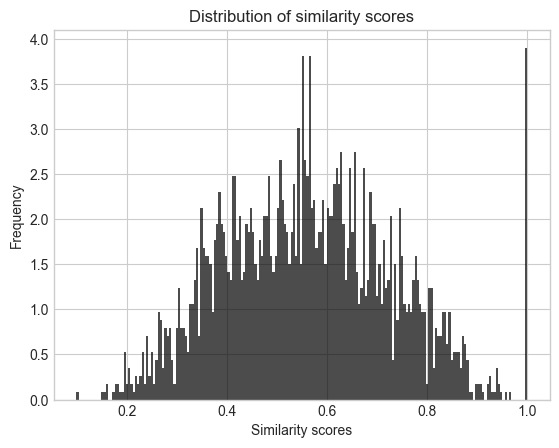

In [30]:
with plt.style.context("seaborn-whitegrid"):
    _, ax = plt.subplots()
    ax.hist(x=list(scores),
            bins=200,
            density=.5,
            alpha=.7,
            color="black")
    ax.set_xlabel("Similarity scores")
    ax.set_ylabel("Frequency")
    ax.set_title("Distribution of similarity scores")
    plt.savefig("images/sim_scores_distr.pdf")
    plt.show()

In [17]:
acc_list = []

for threshold in range(2, 10, 1):
    t = threshold/10
    acc, scores = ev.evaluate(X_test, y_test, eval_type="embedding", threshold=t)
    acc_list.append({
        "accuracy": acc,
        "threshold": t
    })

Accuracy: 99.2%
Accuracy: 94.64%
Accuracy: 80.76%
Accuracy: 62.72%
Accuracy: 40.52%
Accuracy: 21.12%
Accuracy: 8.56%
Accuracy: 2.6%


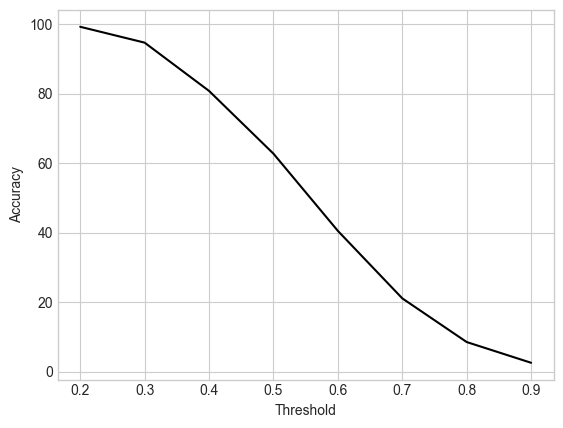

In [22]:
acc_emb_df = pd.DataFrame(acc_list)
with plt.style.context("seaborn-whitegrid"):
    _, ax = plt.subplots()
    acc_emb_df.plot(
        x = "threshold",
        y = "accuracy",
        ax=ax,
        legend=None,
        color="black"
    )
    ax.set_xlabel("Threshold")
    ax.set_ylabel("Accuracy")
    ax.set_title("")
    plt.savefig('images/embedding_threshold.pdf')
    plt.show()